In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("reduced_dataset.csv")
X = df.drop(columns=['num'])

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# K-Means Clustering with Elbow Method

C:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

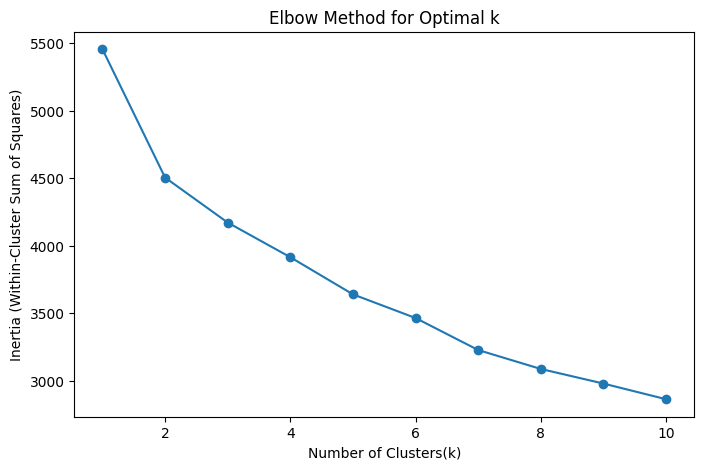

In [8]:
inertia = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [9]:
# Apply K-Means with Chosen k

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) 
clusters_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster_KMeans'] = clusters_kmeans

C:\Users\Lenovo\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


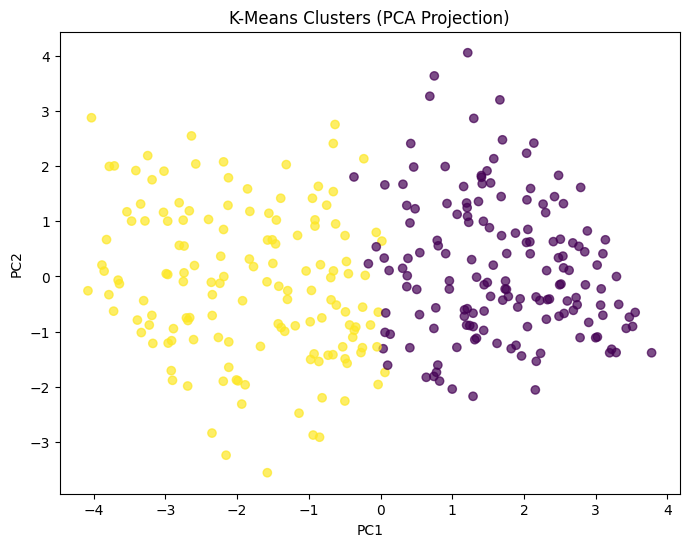

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
# Hierarchical Clustering

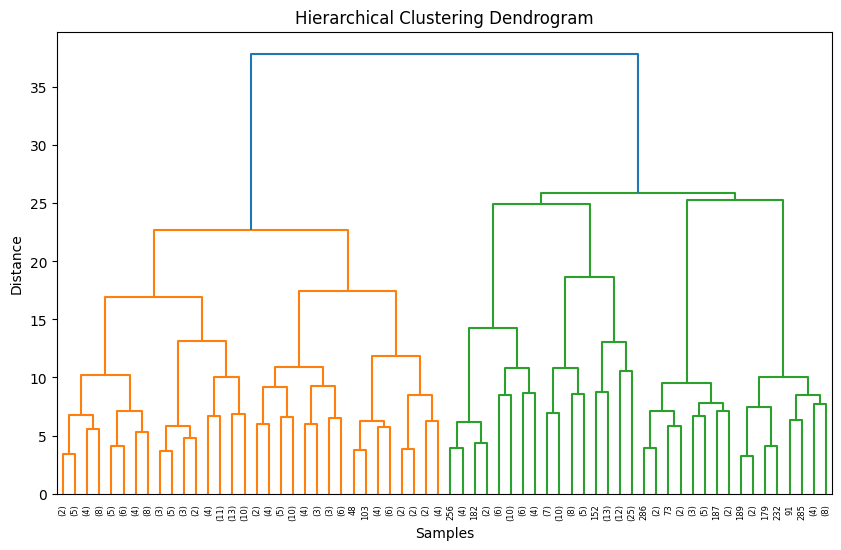

In [21]:
# Create linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assign clusters (e.g., 2 groups)
clusters_hc = fcluster(Z, t=2, criterion='maxclust')
df['Cluster_HC'] = clusters_hc

In [22]:
# Compare Clusters with Actual Labels

In [23]:
comparison_kmeans = pd.crosstab(df['num'], df['Cluster_KMeans'])
comparison_hc = pd.crosstab(df['num'], df['Cluster_HC'])

print("K-Means vs Actual Labels")
print(comparison_kmeans)

print("\nHierarchical Clustering vs Actual Labels")
print(comparison_hc)

K-Means vs Actual Labels
Cluster_KMeans    0   1
num                    
0               131  33
1                21  34
2                 4  32
3                 2  33
4                 0  13

Hierarchical Clustering vs Actual Labels
Cluster_HC    1   2
num                
0           122  42
1            20  35
2             6  30
3             3  32
4             1  12
